# What are Notebooks
Why use them?
-datascience
-education
-presentations
Behind the scenes features 
Old workflow
New workflow
Exploratory Data Analysis
-Highlight ease of sharing results & code
-Highlight quick statistical charting
-Highlight interactive coding
-Highlight interactive charting & reporting
-Markdown & Latex documentation
-magic operator ?variable variable?? ?
-directory nav commands
-! to run other cli commands
-%run to run other scripts
-convert nb to script
-; to suppress output
-you can run inside another IDE= IDECEPTION!
When to not use it...


<center><h1>Developing Differently</h1></center>
<center><h1>with</h1></center>
![alt text](https://datascienceinsider.files.wordpress.com/2015/12/jupyter-logo.png)

## What are Notebooks?
* A somewhere between an ***IDE*** and an ***Interpreter***
* Repeatable, interactive & visual
* Self supporting documentation
* Language Agnostic


# Where do Notebooks get used?
* Data Analytics
    * Interative
    * Visual
    * Connect to distributed computing resources
* Education
    * Descriptive
    * Example => Results
    * Modular, not monolithic
* Presentations
    * Easy to format
    * Run code live (& test before hand)

![alt text](workflow.png)

# Exploratory Data Analysis

>**In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.**

### Getting started...
* What do I have to work with?

In [22]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 58A9-006C

 Directory of C:\Users\G540924\Desktop\GitHub\cc7_jupyter_nb

07/27/2016  12:32 PM    <DIR>          .
07/27/2016  12:32 PM    <DIR>          ..
07/27/2016  10:09 AM                75 .gitignore
07/26/2016  10:04 AM    <DIR>          .ipynb_checkpoints
07/27/2016  10:54 AM             2,705 college.csv
07/27/2016  12:32 PM            11,052 Presentation.ipynb
07/26/2016  09:59 AM                57 README.md
07/27/2016  10:42 AM            42,406 workflow.png
07/27/2016  10:41 AM            62,113 workflow.vsdx
               6 File(s)        118,408 bytes
               3 Dir(s)  51,435,872,256 bytes free


In [3]:
import pandas as pd
df = pd.read_csv('./data/college.csv')
df.head()

,Expenditure,Income,region,year
0,115.72,2726.4,A,2013
1,130.60,3770.0,A,2013
2,172.80,3490.0,A,2013
3,135.60,4788.0,A,2013
4,128.80,3932.0,A,2013


* **What's going on above?**
    * Import Python Data Analysis Library - Pandas
    * Read the csv file into memory
    * Display the results back in nice format

* **Try it**
    * What's the difference between `print(df.head())` and `df.head()`?
    * What does `;` at the end of a cell do?

In [16]:
df.describe()

,Expenditure,Income
count,150.000000,150.000000
mean,166.444800,3813.677333
std,62.620749,1037.975873
min,55.000000,1602.000000
25%,117.610000,3088.000000
50%,161.300000,3836.000000
75%,215.390000,4436.500000
max,326.000000,6484.000000


* **What's going on above?**
    * Get Summary Statistics
    * Region is not present because it is not numerical
    * Year is being summarized because it is being treated numerically

* **Try it**
    * Change Year to be a Categorical variable
        * `df['year'] = df['year'].astype('category')`
    * What is `df`?
        * `?df`

In [24]:
avg_df = df.groupby(['region']).mean()
avg_df.head()

,Expenditure,Income
region,,
A,173.056296,4495.866667
B,157.140000,4049.177778
C,126.760000,2967.016667
D,219.299487,4166.051282


* **What's going on above?**
    * Aggregating data by the Region and then taking the average

* **Try it**
    * Rename Columns so we know they are averages
        * `avg_df = avg_df.rename(columns={'Expenditure': 'Avg_Exp', 'Income': 'Avg_Income'})`
    * How many records are there for each year?

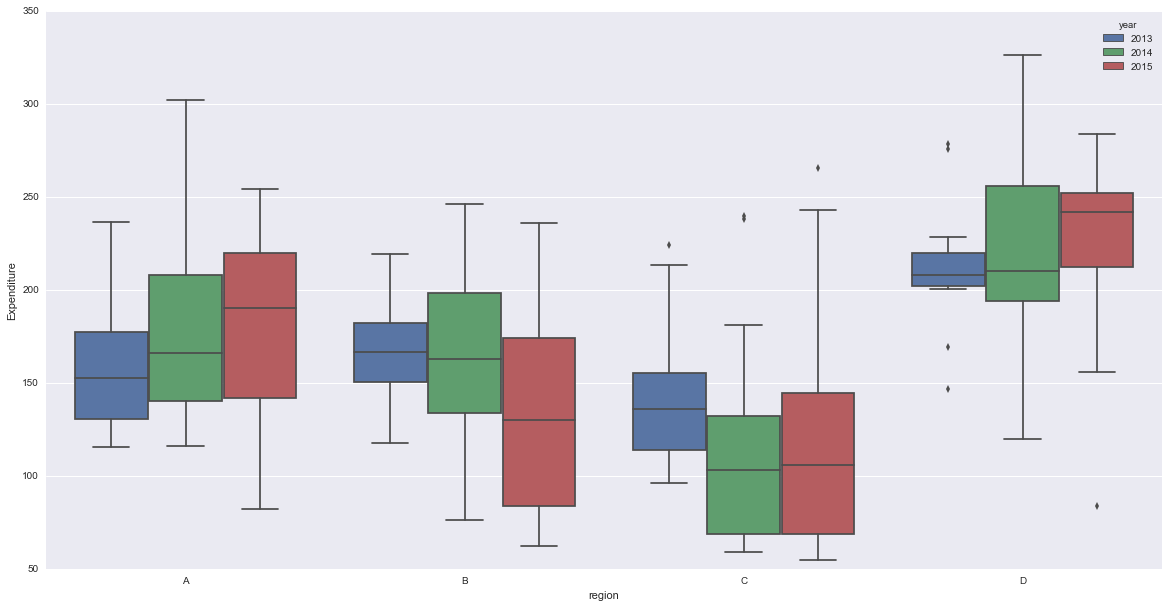

In [28]:
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import seaborn as sns

ax = sns.boxplot(x="region", y="Expenditure", hue="year", data=df)

* **What's going on above?**
    * Use the magic function so that it plots inline
    * Set the plot size (so it presents well)
    * Import statiscal visualization library - Seaborn
    * Box plot expenidures by its categorical variables

* **Try it**
    * Look at incomes